<a href="https://colab.research.google.com/github/miransikay/K-Means-Clustering-Algorithm-From-Scratch-to-Evaluation/blob/main/K_Means_Clustering_Algorithm_From_Scratch_to_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0- Import Libraries and DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1- Classification on the dataset with SVM and KNN. Display confusion matrix


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
x=df.drop("Outcome", axis=1)
y=df["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,train_size=0.7)

In [ ]:
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    model_svc = SVC(kernel=kernel, C=1)
    model_svc.fit(x_train, y_train)
    score = model_svc.score(x_test, y_test)
    print(kernel, " kernel score : ", score)

linear  kernel score :  0.7619047619047619
rbf  kernel score :  0.7402597402597403
poly  kernel score :  0.7705627705627706
sigmoid  kernel score :  0.5454545454545454


In [ ]:
model_svc = SVC( kernel="poly", degree=3, C=1 )
model_svc.fit(x_train, y_train)
svc_prediction_score=model_svc.score(x_test, y_test)
print(svc_prediction_score)

0.7705627705627706


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=27)
model_knn.fit(x_train, y_train)
knn_prediction_score=model_knn.score(x_test, y_test)
print(knn_prediction_score)

0.7359307359307359


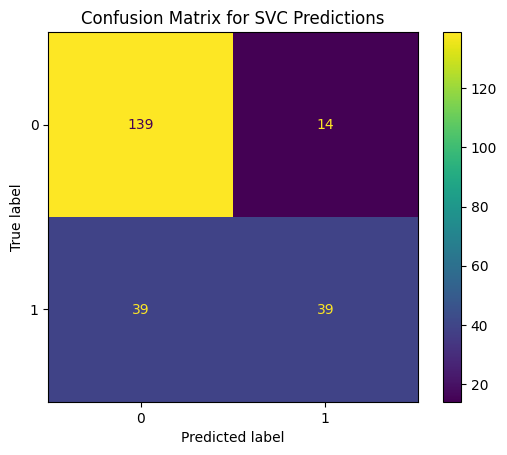

In [ ]:
y_pred_svc = model_svc.predict(x_test)


cm_svc = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(cm_svc).plot()
plt.title("Confusion Matrix for SVC Predictions")
plt.show()

In [ ]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)


print(f"\nAccuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-Score: {f1_svc:.4f}")


Accuracy: 0.7706
Precision: 0.7358
Recall: 0.5000
F1-Score: 0.5954


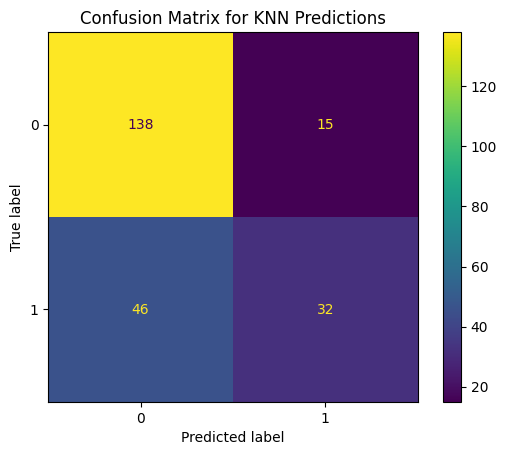

In [ ]:
y_pred_knn = model_knn.predict(x_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Confusion Matrix for KNN Predictions")
plt.show()

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)


print(f"\nAccuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")


Accuracy: 0.7359
Precision: 0.6809
Recall: 0.4103
F1-Score: 0.5120


# 2- Replace some values in the dataset with NaN. Display the result of replacement.

In [ ]:
+

In [ ]:
df=df.astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.notnull().sum()

,0
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


In [ ]:
for column in x.columns:
    random_indices = random.sample(range(len(df)), 60)
    for idx in random_indices:
        df.at[idx, column] = np.nan

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,NaN,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
df.isnull().sum().sum()

480

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,NaN,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,NaN,NaN,0.0,0.232,54.0,1.0


# 3- Replaced NaN values you obtained in step 2 with mean of the corresponding column. Display the result of replacement.

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.000000,0.000000,33.6,0.627,50.0,1.0
1,1.0,85.0,66.000000,29.000000,0.000000,26.6,0.351,31.0,0.0
2,8.0,183.0,68.892655,0.000000,0.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.1,2.288,33.0,1.0
5,5.0,116.0,74.000000,0.000000,0.000000,25.6,0.201,30.0,0.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.0,0.248,26.0,1.0
7,10.0,115.0,0.000000,0.000000,0.000000,35.3,0.134,29.0,0.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.5,0.158,53.0,1.0
9,8.0,125.0,96.000000,20.798023,80.518362,0.0,0.232,54.0,1.0


# 4- Classificaton on the dataset you obtained in Step 3 with SVM and KNN. Display confusion matrix.


In [ ]:
x=df.drop("Outcome", axis=1)
y=df["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,train_size=0.7)

In [ ]:
model_svc_filled = SVC( kernel="poly", degree=3, C=1, )
model_svc_filled.fit(x_train, y_train)
svc_filled_prediction_score=model_svc_filled.score(x_test, y_test)
print(svc_filled_prediction_score)

0.7402597402597403


In [ ]:
model_knn_filled = KNeighborsClassifier(n_neighbors=27)
model_knn_filled.fit(x_train, y_train)
knn_filled_prediction_score=model_knn_filled.score(x_test, y_test)
print(knn_filled_prediction_score)

0.7186147186147186


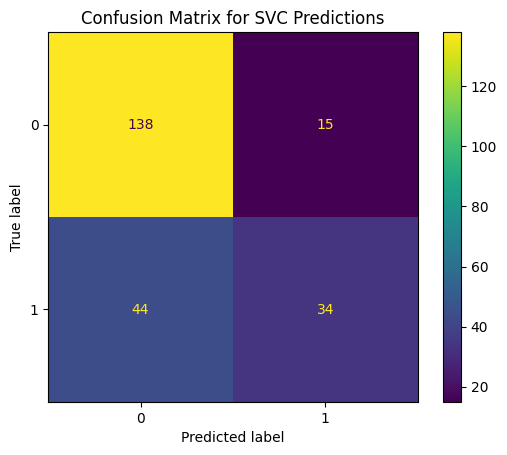

In [ ]:
y_filled_pred_svc = model_svc.predict(x_test)

cm_filled_svc = confusion_matrix(y_test, y_filled_pred_svc)
ConfusionMatrixDisplay(cm_filled_svc).plot()
plt.title("Confusion Matrix for SVC Predictions")
plt.show()

In [ ]:
accuracy_filled_svc = accuracy_score(y_test, y_filled_pred_svc)
precision_filled_svc = precision_score(y_test, y_filled_pred_svc)
recall_filled_svc = recall_score(y_test, y_filled_pred_svc)
f1_filled_svc = f1_score(y_test, y_filled_pred_svc)


print(f"\nAccuracy: {accuracy_filled_svc:.4f}")
print(f"Precision: {precision_filled_svc:.4f}")
print(f"Recall: {recall_filled_svc:.4f}")
print(f"F1-Score: {f1_filled_svc:.4f}")


Accuracy: 0.7446
Precision: 0.6939
Recall: 0.4359
F1-Score: 0.5354


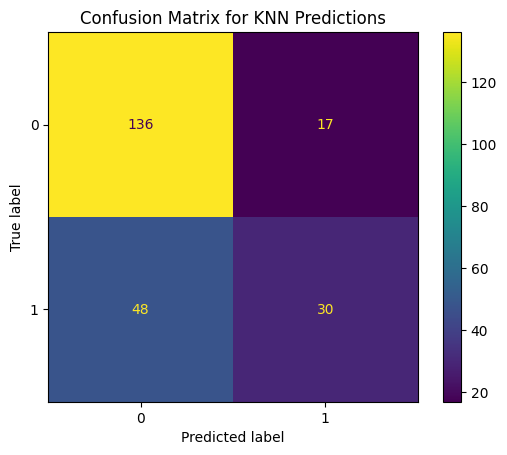

In [ ]:
y_filled_pred_knn = model_knn.predict(x_test)

cm_filled_knn = confusion_matrix(y_test, y_filled_pred_knn)
ConfusionMatrixDisplay(cm_filled_knn).plot()
plt.title("Confusion Matrix for KNN Predictions")
plt.show()

In [ ]:
accuracy_filled_knn = accuracy_score(y_test, y_filled_pred_knn)
precision_filled_knn = precision_score(y_test, y_filled_pred_knn)
recall_filled_knn = recall_score(y_test, y_filled_pred_knn)
f1_filled_knn = f1_score(y_test, y_filled_pred_knn)


print(f"\nAccuracy: {accuracy_filled_knn:.4f}")
print(f"Precision: {precision_filled_knn:.4f}")
print(f"Recall: {recall_filled_knn:.4f}")
print(f"F1-Score: {f1_filled_knn:.4f}")


Accuracy: 0.7186
Precision: 0.6383
Recall: 0.3846
F1-Score: 0.4800
